In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy import exp, log, log2
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.set('notebook', font='serif', font_scale=1.5)

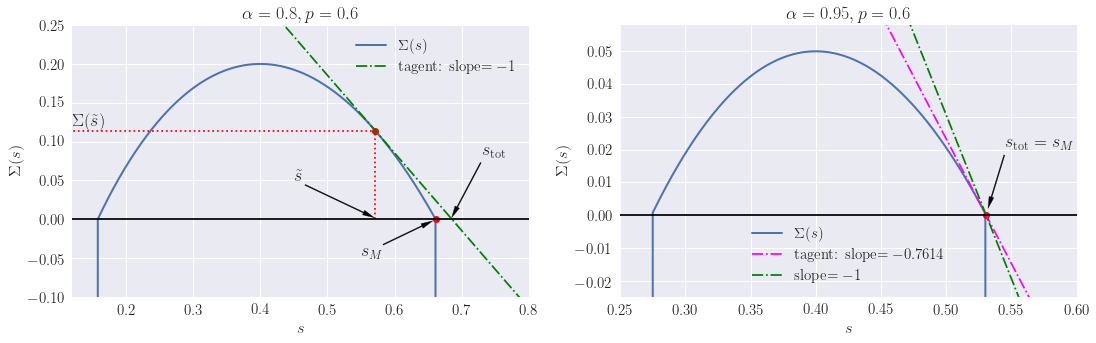

In [166]:
def Complexity(s, alpha, p):
    s = np.array(s)
    s0_mask, s1_mask = s == 0, s == 1
    sn0, sn1 = s[~s0_mask], s[~s1_mask]
    res = np.array((1 - alpha) * np.ones_like(s))
    res[~s0_mask] -= sn0 * log2(sn0/(1-p))
    res[~s1_mask] -= (1-sn1) * log2((1-sn1)/p)
    return res

def plot_subcube_complexity(alpha, p, plot_bound=(0, 1, -0.1, 1)):
    s = np.linspace(0, 1, 1001)
    Sigma = Complexity(s,alpha,p)
    Sigma[Sigma<0] = -1e5
    s_tilde = 2*(1-p) / (2-p)
    Sigma_tilde = Complexity(s_tilde, alpha, p)
    s_M = fsolve(Complexity, x0=0.99, args=(alpha, p))[0]
    if Sigma_tilde >= 0:
        tangent1 = Sigma_tilde + s_tilde - s
    else:
        slope_star = log2( (1-p)*(1-s_M) / (p*s_M) )
        tangent0 = slope_star * (s - s_M)
        tangent1 = s_M - s
        
    plt.plot(s, Sigma, linewidth=2, label=r'$\Sigma(s)$')
    plt.plot(s_M, 0, marker='o', color='red')
    if Sigma_tilde < 0:
        plt.plot(s, tangent0, linestyle='-.', color='magenta', label=r'tagent: slope$={0:.4f}$'.format(slope_star))
        plt.plot(s, tangent1, linestyle='-.', color='green', label=r'slope$=-1$')
    if Sigma_tilde >= 0:
        plt.plot(s_tilde, Complexity(s_tilde, alpha, p), marker='o', color='red')
        plt.plot([s_tilde, s_tilde], [0, Sigma_tilde], linestyle=':', color='red')
        plt.plot([0, s_tilde], [Sigma_tilde, Sigma_tilde], linestyle=':', color='red')
        plt.plot(s, tangent1, linestyle='-.', color='green', label=r'tagent: slope$=-1$')
    plt.axhline(y=0, color='black')
    plt.legend()
    plt.xlabel(r'$s$')
    plt.ylabel(r'$\Sigma(s)$')
    plt.title(r'$\alpha={0}, p={1}$'.format(alpha, p))
    
    xmin, xmax, ymin, ymax = plot_bound
    plt.xlim((xmin,xmax))
    plt.ylim((ymin,ymax))

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plot_subcube_complexity(alpha=0.8, p=0.6, plot_bound=(0.12, 0.8, -0.1, 0.25))
plt.text(0.12, 0.12, r'$\Sigma(\tilde{s})$')
plt.annotate(r'$\tilde{s}$', xy=(0.57, 0.002), xytext=(0.45, 0.05),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.annotate(r'$s_M$', xy=(0.657, -0.002), xytext=(0.55, -0.05),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.annotate(r'$s_{\mathrm{tot}}$', xy=(0.685, 0.002), xytext=(0.73, 0.08),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.subplot(1,2,2)
plot_subcube_complexity(alpha=0.95, p=0.6, plot_bound=(0.25, 0.6, -0.025, 0.058))
plt.annotate(r'$s_{\mathrm{tot}}=s_M$', xy=(0.532, 0.002), xytext=(0.545, 0.02),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.savefig('hw5_3(c)1.pdf', bbox_inches='tight')

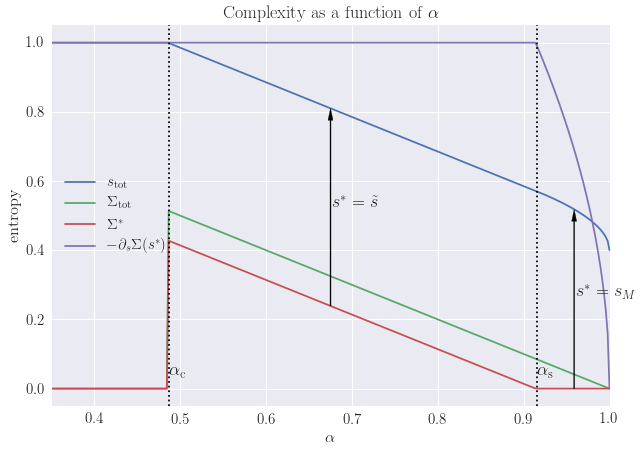

In [217]:
def compute_s_star(alpha, p):
    s_tilde = 2*(1-p) / (2-p)
    Sigma_tilde = Complexity(s_tilde, alpha, p)
    s_M = fsolve(Complexity, x0=0.99, args=(alpha, p))[0]
    if Sigma_tilde >= 0:
        s_star, Sigma_star, m = s_tilde, Sigma_tilde, 1
    else:
        s_star, Sigma_star, m = s_M, 0, -log2( (1-p)*(1-s_M) / (p*s_M) )
    s_tot = Sigma_star + s_star
    Sigma_tot = 1 - alpha
    return s_tot, Sigma_tot, s_star, Sigma_star, m

alpha, alpha_c, alpha_s = np.linspace(0.35, 1, 301), None, None
s_tot, Sigma_tot, s_star, Sigma_star, m = [np.zeros_like(alpha) for _ in range(5)]
for i, a in enumerate(alpha):
    s_tot[i], Sigma_tot[i], s_star[i], Sigma_star[i], m[i] = compute_s_star(a, p=0.6)
    if alpha_c is None and s_tot[i] < 1: alpha_c = a
    if alpha_s is None and Sigma_star[i] == 0: alpha_s = a
    s_tot[i] = min(1, s_tot[i])
    Sigma_tot[i] = Sigma_tot[i] * (s_tot[i]!=1)
    s_star[i] = s_star[i] * (s_tot[i]!=1)
    Sigma_star[i] = Sigma_star[i] * (s_tot[i]!=1)
    
plt.figure(figsize=(10,7))
plt.plot(alpha, s_tot, label=r'$s_{\mathrm{tot}}$')
plt.plot(alpha, Sigma_tot, label=r'$\Sigma_{\mathrm{tot}}$')
plt.plot(alpha, Sigma_star, label=r'$\Sigma^*$')
plt.plot(alpha, m, label=r'$ -\partial_s \Sigma(s^*) $')
plt.axvline(x=alpha_c, linestyle=':', color='black')
plt.text(alpha_c, 0.03, r'$\alpha_{\mathrm{c}}$')
plt.axvline(x=alpha_s, linestyle=':', color='black')
plt.text(alpha_s, 0.03, r'$\alpha_{\mathrm{s}}$')

i1, i2 = 150, -20
plt.annotate('', xy=(alpha[i1], s_tot[i1]), xytext=(alpha[i1], Sigma_star[i1]),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.text(alpha[i1+1], (s_tot[i1]+Sigma_star[i1])/2, r'$s^* = \tilde{s}$')
plt.annotate('', xy=(alpha[i2], s_tot[i2]), xytext=(alpha[i2], Sigma_star[i2]),
             arrowprops=dict(width=1, headwidth=5, facecolor='black'))
plt.text(alpha[i2+1], (s_tot[i2]+Sigma_star[i2])/2, r'$s^* = s_M$')
plt.legend()
plt.xlim((alpha.min(), alpha.max()))
plt.ylim((-0.05,1.05))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'entropy')
plt.title(r'Complexity as a function of $\alpha$')
plt.savefig('hw5_3(c)2.pdf', bbox_inches='tight')

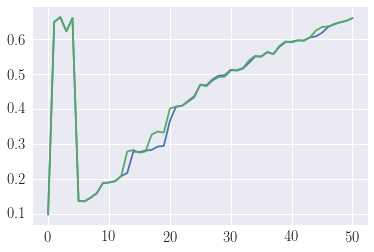

In [15]:
mat = np.load('planted_graph_coloring_result_q=3_N=10000 (2).npz')
Q_planted, f_planted, f_perturb, Q_perturb = [mat[key] for key in ['Q_planted', 'f_planted', 'f_perturb', 'Q_perturb']]
c = np.linspace(4, 4.5, 101)
sns.set('notebook', font='serif', font_scale=1.5)
# c = mat['c']
plt.plot(Q_perturb)
plt.plot(Q_planted)

In [20]:
mat['c']

array([12.5 , 12.51, 12.52, 12.53, 12.54, 12.55, 12.56, 12.57, 12.58,
       12.59, 12.6 , 12.61, 12.62, 12.63, 12.64, 12.65, 12.66, 12.67,
       12.68, 12.69, 12.7 , 12.71, 12.72, 12.73, 12.74, 12.75, 12.76,
       12.77, 12.78, 12.79, 12.8 , 12.81, 12.82, 12.83, 12.84, 12.85,
       12.86, 12.87, 12.88, 12.89, 12.9 , 12.91, 12.92, 12.93, 12.94,
       12.95, 12.96, 12.97, 12.98, 12.99, 13.  , 13.01, 13.02, 13.03,
       13.04, 13.05, 13.06, 13.07, 13.08, 13.09, 13.1 , 13.11, 13.12,
       13.13, 13.14, 13.15, 13.16, 13.17, 13.18, 13.19, 13.2 , 13.21,
       13.22, 13.23, 13.24, 13.25, 13.26, 13.27, 13.28, 13.29, 13.3 ,
       13.31, 13.32, 13.33, 13.34, 13.35, 13.36, 13.37, 13.38, 13.39,
       13.4 , 13.41, 13.42, 13.43, 13.44, 13.45, 13.46, 13.47, 13.48,
       13.49, 13.5 , 13.51, 13.52, 13.53, 13.54, 13.55, 13.56, 13.57,
       13.58, 13.59, 13.6 , 13.61, 13.62, 13.63, 13.64, 13.65, 13.66,
       13.67, 13.68, 13.69, 13.7 , 13.71, 13.72, 13.73, 13.74, 13.75,
       13.76, 13.77,